Jonathan Hernandez

Examining Frequency of words used in Jeopardy Questions.

I will look at the corpus of over 200k+ questions from 1984 to around January 2012

Data: https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/

Download: https://drive.google.com/file/d/0BwT5wj_P7BKXb2hfM3d2RHU1ckE/view

Reddit User u/trexmatt scraped the Jeopardy data from the below website:
http://www.j-archive.com/

In [1]:
import pandas as pd
import nltk
import re
import enchant
import matplotlib.pyplot as plt

Read in json data

In [2]:
jeopardy = pd.read_json("JEOPARDY_QUESTIONS1.json")
print "Number of questions: ", len(jeopardy)

Number of questions:  216930


Extract only the questions that were asked

In [3]:
questions = jeopardy.question

Preview of some of the questions

How many words are in the dataset?

First let's join the questions into on big string as a corpus based on the whitespace character and then tokenize the words

In [4]:
d = enchant.Dict("en_US")
# join the list of strings into one
corpus = " ".join(questions)
tokens = nltk.word_tokenize(corpus) # tokenize the string

Normalize the words

In [5]:
words = [w.lower() for w in tokens]
n_words = len(words) # total number of words
print "Number of words in corpus: ", n_words

Number of words in corpus:  4086745


Over 4 million words in over 28 years of jeopardy questions!

Now let's see which words are actually part of the English language.

For this assignment, i'm only considering 2 letters or more with no digits and special characters such as '.' as valid words

I'll use regular expressions to filter out based on the above and then use the python enchant package's check() function to see if it is a valid word.

In [6]:
words_only = [w for w in words if re.search(r"^[a-z]{1,}[^\W|\d]+$",w)]
words_only = [w for w in words_only if d.check(w)] # only if valid in the English Language
n_unique_words = len(set(words_only)) 
print "Number of unique words: ", n_unique_words

Number of unique words:  37824


After running for a few seconds, we see that the Jeopardy corpus of 28 years of questions contains close to 38000 unique English words.

Using the most common words, how many unique represent half of the total words in the corpus?

I'll use nltk's FreqDist() function for this

In [7]:
fdist = nltk.FreqDist(words_only) # frequency distribution
large_freq = 0 # counter
for freq in fdist:
    if fdist[freq] > (n_words / 2): # if greater than half the total words
        large_freq = large_freq + 1
print "Number of unique words that occur more than half of the total words in corpus: ", large_freq

Number of unique words that occur more than half of the total words in corpus:  0


This shows that none of the unique words don't even come close to half of the total words in the corpus

Identify the 200 highest frequency words in this corpus

I'll print out the words and frequencies and the output is in reverse order.

In [8]:
most_freq_100 = fdist.most_common(100) # 200 most frequent words sorted by count
for word, frequency in most_freq_100: # iterate and print
    print word, frequency

the 159660
of 113472
this 106279
in 80984
to 50357
for 35403
is 34621
was 29775
on 23269
it 20561
from 17957
with 17247
that 15959
by 15778
his 15589
as 15555
these 13977
he 12793
you 12678
one 11842
an 11547
at 11365
name 11153
or 10274
first 9942
are 8576
its 8213
who 7633
city 7338
here 7020
be 6710
has 6111
and 6022
country 5954
her 5953
man 5522
named 5426
called 5368
state 5289
have 5219
about 5128
can 5051
but 4913
when 4894
seen 4860
film 4756
new 4745
not 4736
like 4731
clue 4677
type 4556
were 4370
up 4331
she 4216
made 4044
your 3995
crew 3982
which 3978
title 3931
used 3881
had 3874
known 3670
world 3605
after 3591
into 3570
out 3515
do 3474
also 3431
no 3426
word 3286
only 3274
all 3253
him 3199
became 3163
said 3152
president 3132
may 3125
years 3058
novel 2987
played 2986
wrote 2955
over 2937
my 2913
they 2875
capital 2862
king 2715
their 2714
term 2656
than 2612
war 2594
part 2590
book 2541
last 2517
island 2510
show 2489
most 2480
won 2478
been 2402
famous 2369
french 

We see that the most frequent word is 'the' followed by 'of', then 'this' as the top 3. After a while the frequencies start to decrease but a slower rate.

Create a graph that shows the relative frequency of these 200 words.

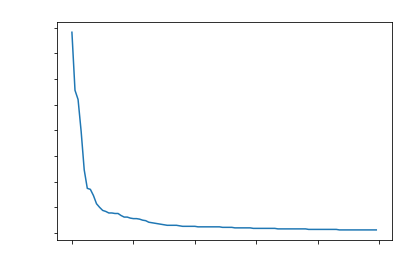

In [15]:
# compute the relative frequency and round it to 4 decimal places
frequency = [x[1] for x in most_freq_100] # frequencies of words
rel_frequency = [round(float(x)/n_words, 4) for x in frequency]
plt.plot(rel_frequency) # log-scale
plt.xlabel("Rank of words in corpus", color="w")
plt.ylabel("Relative Frequency of Words", color="w")
plt.title("Zipf Plot of 100 Most Common Words", color="w")
plt.xticks(color="w")
plt.yticks(color="w")
plt.show()

We see that this plot shows that as the rank of a word decreases the relative frequency decreases a slower rate.

Does the observed relative frequency of these words follow Zipf’s law?

Zipf's law: https://simple.wikipedia.org/wiki/Zipf%27s_law

States that the frequency of a word is inversely porportional to it's rank in the frequency table.

This applies as by looking at the graph, the slope decreases fast and for less frequent words. The other words after 'the' appear a fraction of times than 'the' and slowly decrease. The word distribution should follow a inverse porporational law which is what is shown above and Zip's law holds for this corpus.

In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency of words in this corpus does slighly differ in all words in all corpora.
Other corpora depending on context and setting may differ and have a different frequency distribution and may have
not for example 'the' as the most common word. I say the frequency distribution follows a similar pattern just with different words and context.